In [1]:
from meta_opt.utils.experiment_utils import make, process_results, bcolors, plot, get_final_cparams

import os
import matplotlib.pyplot as plt
from IPython.display import HTML
import itertools
import dill as pkl

# Load

In [7]:
# configuration
CFG = {
    # training options are None because we arent training :)
    'workload': None,
    'num_iters': None,
    'eval_every': None,
    'num_eval_iters': None,
    'batch_size': None,
    'full_batch': True,
    'reset_every': None,

    # experiment options
    'experiment_name': 'wmt_test',
    'load_checkpoint': True,
    'overwrite': False,  # whether to allow us to overwrite existing checkpoints or throw errors
    'directory': os.path.abspath("../"),
}
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
processed_results = process_results(CFG, results)
# processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/wmt_test_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/wmt_test_raw.pkl, containing ['adamw']
note: using full_batch means we will never eval
cannot save processed results with existing processed results and `overwrite=False`


In [3]:
# from meta_opt.utils.experiment_utils import save_checkpoint
# ret = {}
# for k in results[0].keys():
#     ret[k] = [r[k][0] for r in results]
#     for i in range(len(results)):
#         ret[k][i]['args']['experiment_name'] = 'cifar_wd'
# save_checkpoint(CFG, ret)

In [4]:
# baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], 'mnist_baselines'), 'rb'))
# r = {}
# for k in baseline_results.keys(): 
#     r[k] = baseline_results[k]
#     for _k, _v in processed_results[k].items():
#         r[k][_k] = _v
# processed_results = r

# Plot
Plot and also animate the values taken by the $\{M_h\}_{h=1}^H$ coefficients during training. Each $M_h$ multiplies a disturbance from $h$ training steps ago (i.e. 0 is most recent in this plot).

In [9]:
print(results['adamw'][0][1500])
print(processed_results['bleu']['adamw'])

{'timestamp': 217.63184855901636, 'loss': Array(8.594815, dtype=float32), 'bleu': 0.06937041112236422}
{'t': [1500, 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500, 15000, 16500, 18000, 19500, 21000, 22500], 'avg': array([0.06937041, 0.04476041, 0.05210192, 0.12269172, 0.18749744,
       0.20895192, 0.1734913 , 0.12887438, 0.172212  , 0.13074025,
       0.14470691, 0.19203712, 0.20492345, 0.18844779, 0.19221437]), 'std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}


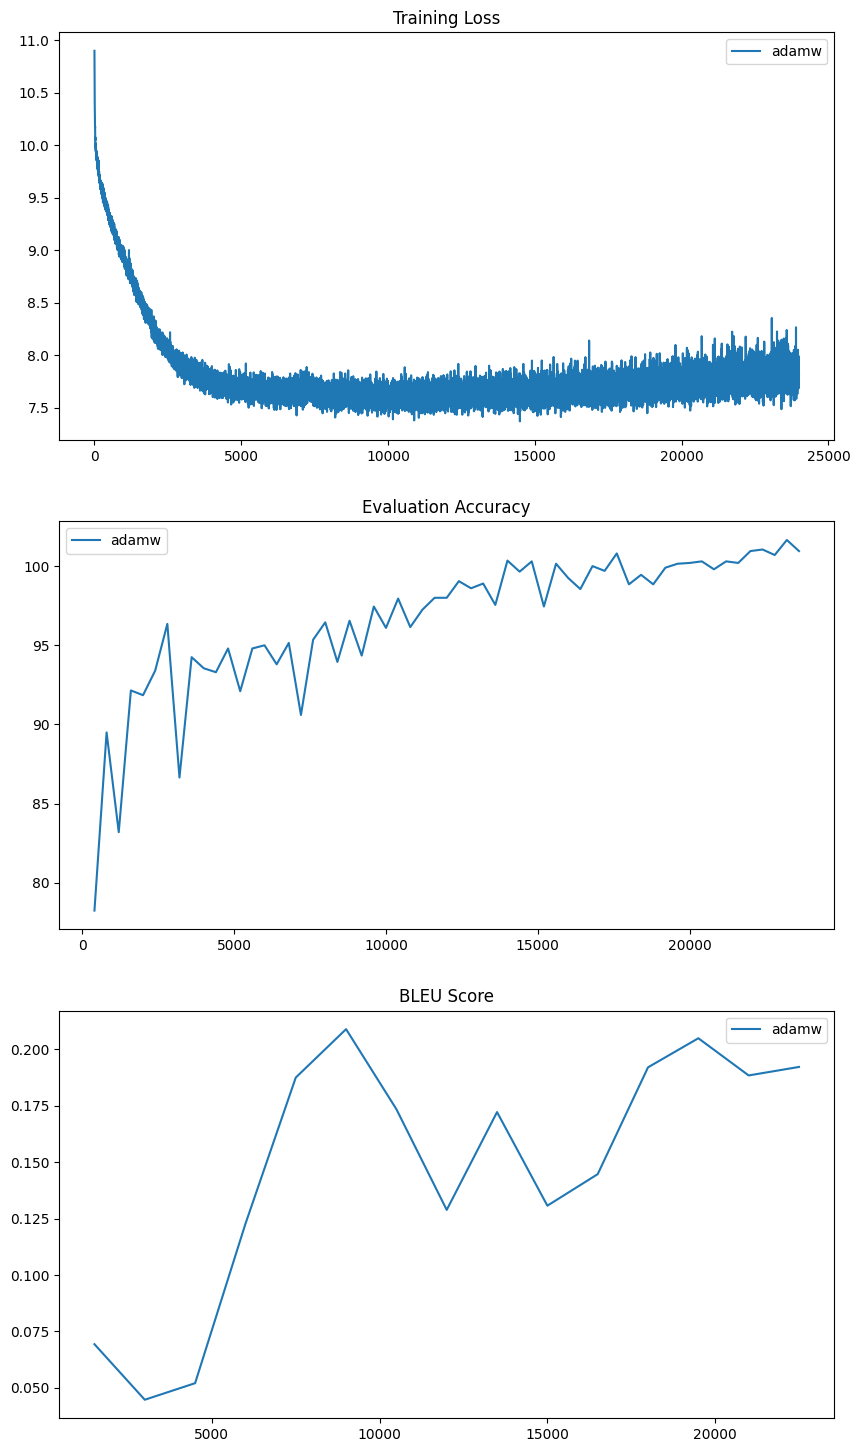

In [10]:
# ----------------------------------------
# plot a particular set of experiments
# ----------------------------------------
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adap',
    'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'cf': 'ours (finetuned)',
    # 'ncf': 'ours (finetuned)',
    'frozen': 'ours (frozen)',
}

plots_to_make = {
              'loss': 'Training Loss',
              'eval_acc': 'Evaluation Accuracy',
              'bleu': 'BLEU Score',
              # 'M': 'Learned Coefficients',
              # 'anim': 'Animation'
}

# ----------------------------------------
# OR just plot em via regex
# ----------------------------------------
# keys_to_plot = '.*long.*'  # specific regex
# keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-0.15, 0.05), smoothing=None)
# ax[0].set_ylim(0.,1.5)
# ax[0].set_xlim(0, 4000)
# ax[1].set_ylim(0.6, 0.95)
# ax[2].set_ylim(0.95, 0.99)
# ax[3].set_ylim(0.95, 0.99)
# ax[4].set_ylim(-0.1, 40)
# ax[5].set_ylim(-0.05, 0.05)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)